# 1. Data Familiarization


This notebook depicts our first encouter with the Zanders dataset.


In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

In [41]:
warnings.filterwarnings('ignore')

# Data Exploration

In [42]:
df = pd.read_pickle('Erasmus_data_stresstesting_2024.pickle')

In [43]:
# Create a snapshot of the df
df.iloc[1:20, :].to_csv('df_snapshot.csv')

In [44]:
# number of defaults in each year
for i in range(2000, 2023):
    print(f'Year {i}: {df.loc[df["status_year"]==i]["default_indicator"].sum()}')

Year 2000: 0
Year 2001: 3
Year 2002: 13
Year 2003: 6
Year 2004: 14
Year 2005: 16
Year 2006: 24
Year 2007: 34
Year 2008: 29
Year 2009: 73
Year 2010: 100
Year 2011: 939
Year 2012: 1378
Year 2013: 1364
Year 2014: 1325
Year 2015: 1412
Year 2016: 1644
Year 2017: 1382
Year 2018: 1202
Year 2019: 1308
Year 2020: 825
Year 2021: 695
Year 2022: 404


In [45]:
df.loc[df['industry_code']== 'C']

,index,bvd_id_number,country_code,industry_code,size_class,status_year,status_date_latest,status_latest,default_indicator,fixed_assets_0,...,cash_flow_2,cash_flow_3,added_value_0,added_value_1,added_value_2,added_value_3,ebitda_0,ebitda_1,ebitda_2,ebitda_3
9,7000375,IT00174710145,IT,C,SME,2006,16991231,non_default,0,1384038.0,...,263278.0,286875.0,814785.0,834961.0,832154.0,767041.0,294436.0,323697.0,363494.0,313583.0
10,7000376,IT00174710145,IT,C,SME,2005,16991231,non_default,0,1067546.0,...,286875.0,291243.0,834961.0,832154.0,767041.0,746729.0,323697.0,363494.0,313583.0,304113.0
15,7003156,SE5564586948,SE,C,SME,2012,16991231,non_default,0,3341981.0,...,-923462.0,495902.0,1768811.0,2787704.0,2495711.0,NaN,-635397.0,385997.0,-879095.0,514532.0
18,7000109,UA24658276,UA,C,SME,2009,16991231,non_default,0,5636087.0,...,520493.0,-339445.0,NaN,NaN,2223147.0,1741338.0,-628173.0,248225.0,647193.0,-153213.0
25,7003043,IT02421270162,IT,C,SME,2019,16991231,non_default,0,4437739.0,...,233084.0,263087.0,2116978.0,1907583.0,1592715.0,1343782.0,692973.0,425306.0,387752.0,348976.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526929,331533936,GB00150911,GB,C,SME,2006,16991231,non_default,0,1225509.0,...,242615.0,298971.0,2517778.0,2554823.0,2670289.0,NaN,49648.0,350668.0,331206.0,396213.0
1526934,395339735,DE6110032026,DE,C,SME,2019,16991231,non_default,0,120224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1526935,395365784,DE6090005259,DE,C,SME,2020,16991231,non_default,0,2436483.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1526955,395389228,DE6090070444,DE,C,SME,2019,16991231,non_default,0,1836948.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Selecting columns that has less than 200_000 missing values

l = df.columns[df.isna().sum() < 200_000]

In [47]:
print(f'Columns that we are keeping:\n {l}')

Columns that we are keeping:
 Index(['index', 'bvd_id_number', 'country_code', 'industry_code', 'size_class',
       'status_year', 'status_date_latest', 'status_latest',
       'default_indicator', 'fixed_assets_0', 'intangible_fixed_assets_0',
       'tangible_fixed_assets_0', 'other_fixed_assets_0', 'current_assets_0',
       'stock_0', 'debtors_0', 'other_current_assets_0',
       'cash_cash_equivalent_0', 'total_assets_0', 'shareholders_funds_0',
       'capital_0', 'other_shareholders_funds_0', 'noncurrent_liabilities_0',
       'long_term_debt_0', 'other_noncurrent_liabilities_0',
       'current_liabilities_0', 'loans_0', 'creditors_0',
       'other_current_liabilities_0', 'total_shareh_funds_liab_0',
       'working_capital_0', 'operating_revenue_0', 'operating_pl_ebit_0',
       'financial_expenses_0', 'financial_pl_0', 'pl_before_tax_0',
       'taxation_0', 'pl_after_tax_0', 'pl_for_period_net_income_0'],
      dtype='object')


In [48]:
print(f'Columns that we are discarting (as of now):\n {df.columns.difference(l)}')

Columns that we are discarting (as of now):
 Index(['added_value_0', 'added_value_1', 'added_value_2', 'added_value_3',
       'capital_1', 'capital_2', 'capital_3', 'cash_cash_equivalent_1',
       'cash_cash_equivalent_2', 'cash_cash_equivalent_3',
       ...
       'taxation_3', 'total_assets_1', 'total_assets_2', 'total_assets_3',
       'total_shareh_funds_liab_1', 'total_shareh_funds_liab_2',
       'total_shareh_funds_liab_3', 'working_capital_1', 'working_capital_2',
       'working_capital_3'],
      dtype='object', length=174)


Most of the missing values are part of the lags

In [49]:
# Number of companies before and after dropping using only columns with < 200_000 NAs
print(len(df['bvd_id_number'].unique()))
print(len(df[l].dropna()['bvd_id_number'].unique()))

556866
380054


In [50]:
# Define new dataframe with dropped colums

df2 = df[l].dropna()

In [51]:
print(f'Unconditional default rate after droppign columns: {df["default_indicator"].sum()/len(df["bvd_id_number"])}')

Unconditional default rate after droppign columns: 0.009292864730205675


In [52]:
print(f'Unconditional default rate after droppign columns: {df2["default_indicator"].sum()/len(df2["bvd_id_number"])}')

Unconditional default rate after droppign columns: 0.009715654967796535


In [53]:
# Column status latest is useless as it contains only one value

df['status_latest'].unique()

array(['non_default'], dtype=object)

In [54]:
print(f"Unique industries:\n {df2['industry_code'].unique()}")

Unique industries:
 ['G' 'F' 'N' 'GX' 'C' 'J' 'M' 'H' 'A' 'L' 'B' 'S' 'Q' 'D' 'E' 'K' 'I' 'R'
 'P']


In [55]:
print(f"Unique countries:\n {df2['country_code'].unique()}")

Unique countries:
 ['RU' 'IT' 'ES' 'SE' 'UA' 'PL' 'BG' 'NO' 'HR' 'RO' 'DE' 'CZ' 'GB' 'SK'
 'SI' 'RS' 'PT' 'AU' 'FI' 'US' 'AT' 'BE' 'HU' 'KZ' 'IS' 'AM' 'DK' 'CO'
 'LT' 'NL' 'GE' 'MU' 'MD' 'LV' 'BY']


### We take a closer look on Italy, which has the most obervations among countries

In [56]:
values, counts = np.unique(df2['country_code'], return_counts=True)
max_i = np.argmax(counts)
values[max_i]

'IT'

In [57]:
df2[df2['country_code'] == 'IT']

,index,bvd_id_number,country_code,industry_code,size_class,status_year,status_date_latest,status_latest,default_indicator,fixed_assets_0,...,total_shareh_funds_liab_0,working_capital_0,operating_revenue_0,operating_pl_ebit_0,financial_expenses_0,financial_pl_0,pl_before_tax_0,taxation_0,pl_after_tax_0,pl_for_period_net_income_0
9,7000375,IT00174710145,IT,C,SME,2006,16991231,non_default,0,1384038.0,...,3128339.0,-1290288.0,7153464.0,157932.0,10463.0,1948.0,159880.0,99269.0,60611.0,60611.0
10,7000376,IT00174710145,IT,C,SME,2005,16991231,non_default,0,1067546.0,...,2078526.0,-453473.0,6622374.0,213750.0,8737.0,-380.0,213370.0,103094.0,110276.0,110276.0
11,7000905,IT02969620133,IT,G,SME,2019,16991231,non_default,0,925814.0,...,5918714.0,3757057.0,8982328.0,818680.0,14099.0,-8099.0,810581.0,247588.0,562993.0,562993.0
12,7000907,IT02969620133,IT,G,SME,2017,16991231,non_default,0,878699.0,...,4304819.0,2473106.0,6502724.0,143068.0,3806.0,28116.0,171184.0,62097.0,109087.0,109087.0
16,7003402,IT05253550965,IT,J,SME,2014,16991231,non_default,0,1093289.0,...,7564534.0,0.0,8103962.0,1696660.0,9672.0,-6765.0,1689895.0,637300.0,1052595.0,1061759.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526917,430272630,IT00726060155,IT,C,SME,2011,16991231,non_default,1,4697330.0,...,11114746.0,3588397.0,5717913.0,142477.0,198337.0,-169554.0,-27077.0,65966.0,-93043.0,6210.0
1526923,86196217,IT01588300465,IT,G,SME,2017,16991231,non_default,0,257513.0,...,6572480.0,4403884.0,5978998.0,-126172.0,100350.0,-95926.0,-222098.0,2775.0,-224873.0,-224873.0
1526925,233482640,IT01998880486,IT,G,SME,2013,16991231,non_default,0,375161.0,...,2839242.0,1058990.0,8685090.0,-81389.0,6822.0,-6019.0,-87408.0,-9044.0,-78364.0,-73872.0
1526940,430282806,IT00735460347,IT,G,SME,2010,16991231,non_default,0,2527102.0,...,2803597.0,-50886.0,7644379.0,-872244.0,136598.0,-90128.0,-962372.0,0.0,-962372.0,221392.0


#### Averaging micro variables based on country and year

In [58]:


fxa = {}
for i in range(2003, 2022):
    try: 
        val = df2[(df2['country_code'] == 'IT') & (df2['status_year'] == i)].groupby(['status_year']).mean().reset_index()['fixed_assets_0'][0]
        fxa[i] = val
        print(val)
    except:
        continue

1768688.6
1870578.2
2075863.2
2119727.5
2128763.5
2452787.5
2706613.0
2605345.0
2650301.5
3174496.8
3353939.0
3045837.2
2955795.0
3012624.2
2867696.2
2821611.2
2843452.0
3632771.0
3116902.8


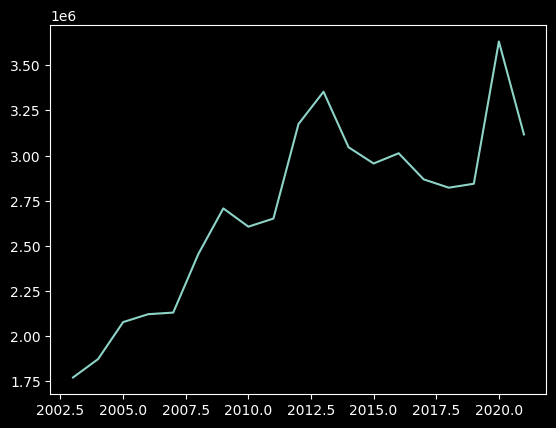

In [59]:
mlist = sorted(fxa.items())
x, y = zip(*mlist)
plt.plot(x, y)